# Visit Nederland

In [1]:
from pathlib import Path

import fiona
import geopandas as gpd
import folium

## Data Loading

In [2]:
data_folder = Path('../../../data')

In [3]:
fiona.listlayers(f'{data_folder}/nederland_admin_areas.gpkg')

['gemeentegebied', 'landgebied', 'provinciegebied']

In [4]:
provinces = gpd.read_file(f'{data_folder}/nederland_admin_areas.gpkg', layer='provinciegebied')

## Data Inspection

In [5]:
provinces.shape

(12, 6)

In [6]:
provinces.head(1)

identificatie     naam code ligt_in_land_code ligt_in_land_naam  \
0          PV22  Drenthe   22              6030         Nederland   

                                            geometry  
0  MULTIPOLYGON (((231437.815 516445.643, 231430....

<Axes: >

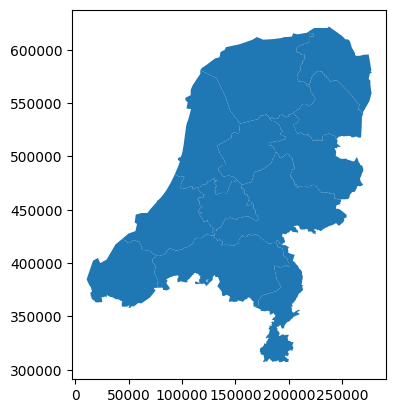

In [7]:
provinces.plot()

In [8]:
provinces

identificatie           naam code ligt_in_land_code ligt_in_land_naam  \
0           PV22        Drenthe   22              6030         Nederland   
1           PV24      Flevoland   24              6030         Nederland   
2           PV21        Fryslân   21              6030         Nederland   
3           PV25     Gelderland   25              6030         Nederland   
4           PV20      Groningen   20              6030         Nederland   
5           PV31        Limburg   31              6030         Nederland   
6           PV30  Noord-Brabant   30              6030         Nederland   
7           PV27  Noord-Holland   27              6030         Nederland   
8           PV23     Overijssel   23              6030         Nederland   
9           PV26        Utrecht   26              6030         Nederland   
10          PV29        Zeeland   29              6030         Nederland   
11          PV28   Zuid-Holland   28              6030         Nederland   

                                             geometry  
0   MULTIPOLYGON (((231437.815 516445.643, 231430....  
1   MULTIPOLYGON (((157694.139 473920.68, 159406.6...  
2   MULTIPOLYGON (((189491.268 535832.617, 189494....  
3   MULTIPOLYGON (((181361.527 418255.386, 181384....  
4   MULTIPOLYGON (((265275.541 549247.459, 265285....  
5   MULTIPOLYGON (((199549.696 308385.049, 199558....  
6   MULTIPOLYGON (((167812.721 359167.748, 167886....  
7   MULTIPOLYGON (((131700.944 464257.265, 131702....  
8   MULTIPOLYGON (((248291.9 459808.449, 248302.77...  
9   MULTIPOLYGON (((131894.47 429932.357, 131917.5...  
10  MULTIPOLYGON (((50235.786 357928.267, 50243.18...  
11  MULTIPOLYGON (((88397 413853.999, 89142.01 413...

In [9]:
websites = {
    'Drenthe': 'https://www.visitdrenthe.com/home',
    'Flevoland': 'https://www.visitflevoland.nl/en',
    'Fryslân': 'https://www.friesland.nl/en',
    'Gelderland': 'https://geldersestreken.nl/',
    'Groningen': 'https://www.visitgroningen.nl/en/discover/province',
    'Limburg': 'https://www.inlimburg.com/en',
    'Noord-Brabant': 'https://www.visitbrabant.com/en',
    'Noord-Holland': 'https://www.noord-holland.nl/Onderwerpen/Toerisme_recreatie/Toeristische_informatie',
    'Overijssel': 'https://www.visitoost.nl/',
    'Utrecht': 'https://www.visitutrechtregion.com/en',
    'Zeeland': 'https://www.zeeland.com/en/visit',
    'Zuid-Holland': 'https://www.zuid-holland.nl/onderwerpen/recreatie-toerisme-en-sport/toerisme/',
}

provinces['website'] = provinces['naam'].map(websites)

In [10]:
provinces

identificatie           naam code ligt_in_land_code ligt_in_land_naam  \
0           PV22        Drenthe   22              6030         Nederland   
1           PV24      Flevoland   24              6030         Nederland   
2           PV21        Fryslân   21              6030         Nederland   
3           PV25     Gelderland   25              6030         Nederland   
4           PV20      Groningen   20              6030         Nederland   
5           PV31        Limburg   31              6030         Nederland   
6           PV30  Noord-Brabant   30              6030         Nederland   
7           PV27  Noord-Holland   27              6030         Nederland   
8           PV23     Overijssel   23              6030         Nederland   
9           PV26        Utrecht   26              6030         Nederland   
10          PV29        Zeeland   29              6030         Nederland   
11          PV28   Zuid-Holland   28              6030         Nederland   

                                             geometry  \
0   MULTIPOLYGON (((231437.815 516445.643, 231430....   
1   MULTIPOLYGON (((157694.139 473920.68, 159406.6...   
2   MULTIPOLYGON (((189491.268 535832.617, 189494....   
3   MULTIPOLYGON (((181361.527 418255.386, 181384....   
4   MULTIPOLYGON (((265275.541 549247.459, 265285....   
5   MULTIPOLYGON (((199549.696 308385.049, 199558....   
6   MULTIPOLYGON (((167812.721 359167.748, 167886....   
7   MULTIPOLYGON (((131700.944 464257.265, 131702....   
8   MULTIPOLYGON (((248291.9 459808.449, 248302.77...   
9   MULTIPOLYGON (((131894.47 429932.357, 131917.5...   
10  MULTIPOLYGON (((50235.786 357928.267, 50243.18...   
11  MULTIPOLYGON (((88397 413853.999, 89142.01 413...   

                                              website  
0                   https://www.visitdrenthe.com/home  
1                    https://www.visitflevoland.nl/en  
2                         https://www.friesland.nl/en  
3                         https://geldersestreken.nl/  
4   https://www.visitgroningen.nl/en/discover/prov...  
5                        https://www.inlimburg.com/en  
6                     https://www.visitbrabant.com/en  
7   https://www.noord-holland.nl/Onderwerpen/Toeri...  
8                           https://www.visitoost.nl/  
9               https://www.visitutrechtregion.com/en  
10                   https://www.zeeland.com/en/visit  
11  https://www.zuid-holland.nl/onderwerpen/recrea...

## Plotting and Exporting a Folium Map

In [11]:
f = folium.Figure(width=1000, height=500)
m = folium.Map(
    tiles='https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}',
    attr='USGS US Imagery',
    max_zoom=8
).add_to(f)

for i, v in provinces.iterrows():
    row = provinces.iloc[[i]]
    folium.GeoJson(
        row,
        style_function= lambda feature: {
            'fillOpacity': 0.1
        },
        highlight_function= lambda feature: {
            'fillOpacity': 0.2
        },
        popup=folium.Popup(folium.Html(
            f"<a href='{row.iloc[0]['website']}' target='_blank' style='color: black; font-weight:bold;'>{row.iloc[0]['naam']} Tourism Website</a>",
            script=True
        )),
        popup_keep_highlighted=True
    ).add_to(m)

m.fit_bounds(m.get_bounds())
m.save('../maps/map.html')
m